### Gaussian Process Regression

We will start by illustrating Gaussian process regression based on estimated hyper-parameters. This can be done easily by the function GaussianProcessRegressor of the sklearn library.

In the end we will also see how to implement the full Bayesian approach on the unknown function paths and hyper-parameters.

In [79]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

### Olympics 100m times

We will illustrate the approach on a real dataset consisting on the times of the 100m Men winners of all the olympic games up to 2008 (feel free to add the times of 2012 and 2016 and repeat the exercise)

In [80]:
data = pd.read_csv('olympics100m.csv')
data

,year,time
0,1896,12.00
1,1900,11.00
2,1904,11.00
3,1906,11.20
4,1908,10.80
5,1912,10.80
6,1920,10.80
7,1924,10.60
8,1928,10.80
9,1932,10.30


Text(0.5,1,'100m Times in Olympic Games')

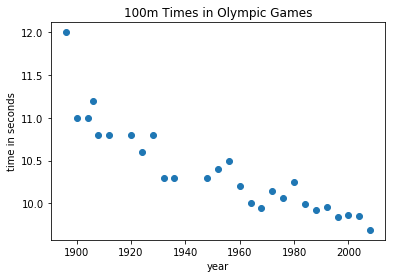

In [81]:
plt.plot(data['year'],data['time'],'o')
plt.xlabel('year')
plt.ylabel('time in seconds')
plt.title('100m Times in Olympic Games')

### Train-Test dataset split

We will consider the even observations (1st Olympics, 3rd Olympics, ...) as a training dataset and will used the other points as test data. Also we will subtract the mean of the times such that the process has mean 0.

In [82]:
train_index = np.linspace(0, 26, 14)
test_index = np.linspace(1, 25, 13)
Xtrain = train_index
Xtest = test_index
Xtrain = np.atleast_2d(Xtrain).T
Xtest = np.atleast_2d(Xtest).T
mu = np.mean(data['time'])
ytrain = data['time'][train_index]-mu
ytest = data['time'][test_index]-mu

x = np.atleast_2d(np.linspace(0, 26, 1000)).T

### Main part of the Gaussian Process Regression fit and prediction

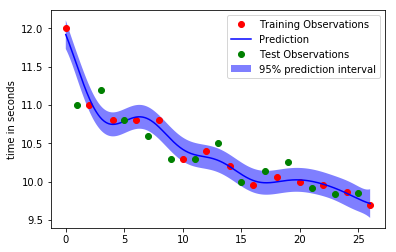

In [83]:
# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=10,alpha=0.1**2)
# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(Xtrain, ytrain)

y_pred, sigma_pred = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(Xtrain.ravel(), ytrain+mu, 'ro', label=r'Training Observations')
plt.plot(x, y_pred+mu, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred + mu - 1.9600 * sigma_pred,
                        (y_pred + mu + 1.9600 * sigma_pred)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% prediction interval')
plt.plot(Xtest.ravel(), ytest+mu, 'go', label=r'Test Observations')
#plt.xlabel('year')
plt.ylabel('time in seconds')
#plt.ylim(-10, 20)
plt.legend(loc='upper right')

plt.show()

### Gaussian Process Classification

We will also consider the classification problem based on the real dataset Iris (used already in week 7).

Again, this can be done easily by the function GaussianProcessRegressor of the sklearn library.


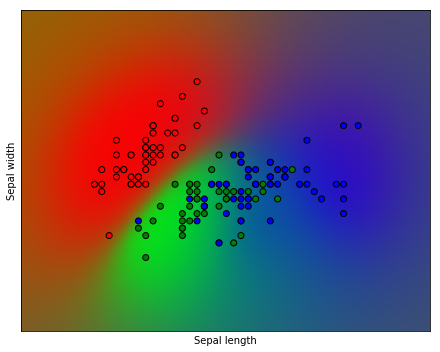

In [84]:
from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier

# import data 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = np.array(iris.target, dtype=int)

h = .02  # step size in the mesh

kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gpc_rbf = GaussianProcessClassifier(kernel=kernel).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.figure(figsize=(10, 5))

Z = gpc_rbf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape((xx.shape[0], xx.shape[1], 3))
plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=np.array(["r", "g", "b"])[y],
            edgecolors=(0, 0, 0))
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.tight_layout()
plt.show()